In [1]:
demo = {a -> 1, b -> 2, c -> 3, m -> 1, n -> 2, k -> 3}

{a -> 1, b -> 2, c -> 3, m -> 1, n -> 2, k -> 3}

The idea is to express the ellipsoid in the frame of the plane, in which it will be much easier to make a cut allong an axis (ie $z = 0$)

## Ellipsoid definition

The canonical form of the ellipsoid is given by:

$$ \left \{ x, y, z \in \mathbb{R}^3 \; / \; \frac{x}{a}^2 + \frac{y}{b}^2 + \frac{z}{c}^2 = 1 \right \}$$

for an ellipsoid which is centered and aligned

2    2    2
x    y    z
-- + -- + --
 2    2    2
a    b    c
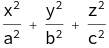

In [2]:
ellipsoidC = (x/a)^2 + (y/b)^2 + (z/c)^2

but there is also a more general definition based on matrices (for an ellipsoid centered)

exx   exy   exz

exy   eyy   eyz

exz   eyz   ezz
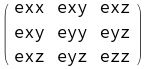

In [3]:
e3 = {
    {exx, exy, exz},
    {exy, eyy, eyz},
    {exz, eyz, ezz}
};
e3 // MatrixForm

The ellipsoid is then defined as $ X^T E X $

In [5]:
g3 = {{x}, {y}, {z}};
ellipsoidM = ((g3 // Transpose) . e3 . g3)[[1, 1]] // FullSimplify

2                    2                                2
exx x  + 2 exy x y + eyy y  + 2 exz x z + 2 eyz y z + ezz z

We can check is is equivalent to the canonical form

-2          -2          -2
{exx -> a  , eyy -> b  , ezz -> c  , exy -> 0, exz -> 0, eyz -> 0}
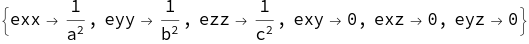

In [7]:
eMtoC = { exx -> 1/a^2, eyy -> 1/b^2, ezz -> 1/c^2, exy -> 0, exz -> 0, eyz -> 0 }

2    2    2
x    y    z
-- + -- + --
 2    2    2
a    b    c
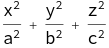

In [8]:
ellipsoidM /. eMtoC

## New Frame

On the cutting plane, we pick a new frame called $\left(O,\vec x_p,\vec y_p,\vec z_p\right)$ which will allow more convenient computations.

$\vec z_p$ is chosen as a unitary vector, normal to the cutting plane

l                   m                   n
{------------------, ------------------, ------------------}
       2    2    2         2    2    2         2    2    2
 Sqrt[l  + m  + n ]  Sqrt[l  + m  + n ]  Sqrt[l  + m  + n ]
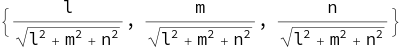

In [9]:
dz = Sqrt[ l^2 + m^2 + n^2 ];
zp = { l/dz, m/dz, n/dz }

We can check that the norm of $\vec z_p$ is $1$

In [11]:
(zp . zp) // FullSimplify

1

$\vec y_p$ is a unitary vector perpendicular to $\vec z_p$, which lies on the $Oxy$ plane

m               l
{-(-------------), -------------, 0}
         2    2          2    2
   Sqrt[l  + m ]   Sqrt[l  + m ]
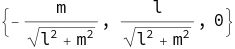

In [12]:
dy = Sqrt[ l^2 + m^2 ];
yp = { -m/dy, l/dy, 0 }

We can check that the norm of $\vec y_p$ is $1$

In [14]:
(yp . yp) // FullSimplify

1

And that $\vec y_p \perp \vec z_p$, because the dot product is null.

In [15]:
yp . zp

0

The last vector is made such as $\left(O,\vec x_p,\vec y_p,\vec z_p\right)$ is a direct orthonormal frame

l n                               m n
{--------------------------------, --------------------------------, 
       2    2        2    2    2         2    2        2    2    2
 Sqrt[l  + m ] Sqrt[l  + m  + n ]  Sqrt[l  + m ] Sqrt[l  + m  + n ]
 
                      2                                   2
                     l                                   m
>   -(--------------------------------) - --------------------------------}
            2    2        2    2    2           2    2        2    2    2
      Sqrt[l  + m ] Sqrt[l  + m  + n ]    Sqrt[l  + m ] Sqrt[l  + m  + n ]
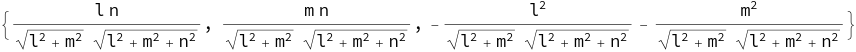

In [16]:
xp = Cross[yp, zp]

In [17]:
(xp . xp) // FullSimplify

1

A rotation matrix from $\left(O,\vec x,\vec y,\vec z\right)$ to $\left(O,\vec x_p,\vec y_p,\vec z_p\right)$ is defined, with $\vec x_p$, $\vec y_p$, $\vec z_p$ as columns:

l n                         m                 l
{{--------------------------------, -(-------------), ------------------}, 
        2    2        2    2    2           2    2          2    2    2
  Sqrt[l  + m ] Sqrt[l  + m  + n ]    Sqrt[l  + m ]   Sqrt[l  + m  + n ]
 
                   m n                       l                m
>   {--------------------------------, -------------, ------------------}, 
           2    2        2    2    2         2    2         2    2    2
     Sqrt[l  + m ] Sqrt[l  + m  + n ]  Sqrt[l  + m ]  Sqrt[l  + m  + n ]
 
                       2                                   2
                      l                                   m
>   {-(--------------------------------) - --------------------------------, 0, 
             2    2        2    2    2           2    2        2    2    2
       Sqrt[l  + m ] Sqrt[l  + m  + n ]    Sqrt[l  + m ] Sqrt[l  + m  + n ]
 
             n
>    ------------------}}
           2    2    2
     Sqrt[l  + m  + n ]
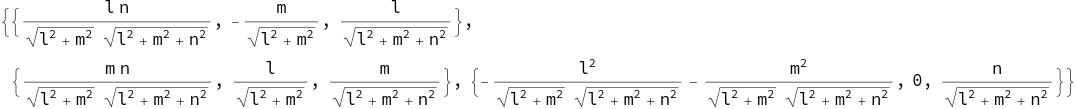

In [18]:
rot = ({xp, yp, zp} // Transpose)

The ellispoid is obtained by rotating the initial matrix $ R A R^T $

2  2                    2    2    2
(b  c  (n (l x + m y) - (l  + m ) z)  + 
 
       2   2   2    2    2             2    2   2    2                   2
>     a  (c  (l  + m  + n ) (m x - l y)  + b  (l  + m ) (l x + m y + n z) )) / 
 
      2  2  2   2    2    2    2    2
>   (a  b  c  (l  + m ) (l  + m  + n ))
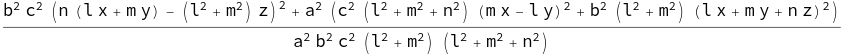

In [19]:
ellipsoidR = ((g3 // Transpose) . (rot . (e3 /. eMtoC) . (rot // Transpose)) . g3)[[1, 1]] // FullSimplify

now that we have an ellipsoid expressed in the new frame, the intersection with the plane is taken for $z = 0$

2  2  2   2    2     2  2  2  2    2  2  2   2    2    2    2
(a  b  l  (l  + m ) + b  c  l  n  + a  c  m  (l  + m  + n )) x
--------------------------------------------------------------- + 
                2  2  2   2    2    2    2    2
               a  b  c  (l  + m ) (l  + m  + n )
 
        2  2       2    2       2  2      2      2  2       2    2    2
    (2 a  b  l m (l  + m ) + 2 b  c  l m n  - 2 a  c  l m (l  + m  + n )) x y
>   ------------------------------------------------------------------------- + 
                         2  2  2   2    2    2    2    2
                        a  b  c  (l  + m ) (l  + m  + n )
 
      2  2  2   2    2     2  2  2  2    2  2  2   2    2    2    2
    (a  b  m  (l  + m ) + b  c  m  n  + a  c  l  (l  + m  + n )) y
>   ---------------------------------------------------------------
                    2  2  2   2    2    2    2    2
                   a  b  c  (l  + m ) (l  + m  + n )
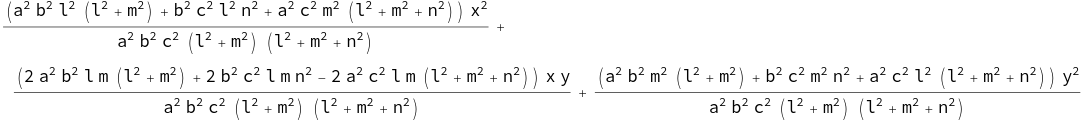

In [20]:
ellipseP = Collect[(ellipsoidR /. { z -> 0}), {x, y, x*y}]

# Ellipse

We can note that, for a 2d ellipse, the matrix form is $X^T E X = 1$, with $E$ being a $2 \times 2$ matrix as follow:

e2xx   e2xy

e2xy   e2yy
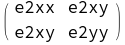

In [21]:
e2 = {
    {e2xx, e2xy},
    {e2xy, e2yy}
};
e2 // MatrixForm

In [23]:
g2 = {{x}, {y}};
ellipseM = Collect[((g2 // Transpose) . e2 . g2)[[1, 1]] // FullSimplify, {x, y, x*y}]

2                      2
e2xx x  + 2 e2xy x y + e2yy y

The matrix being symetric, we can diagonalize

2         2                     2
  e2xx + e2yy - Sqrt[e2xx  + 4 e2xy  - 2 e2xx e2yy + e2yy ]
{{---------------------------------------------------------, 
                              2
 
                            2         2                     2
     e2xx + e2yy + Sqrt[e2xx  + 4 e2xy  - 2 e2xx e2yy + e2yy ]
>    ---------------------------------------------------------}, 
                                 2
 
                                2         2                     2
      -(-e2xx + e2yy + Sqrt[e2xx  + 4 e2xy  - 2 e2xx e2yy + e2yy ])
>   {{-------------------------------------------------------------, 1}, 
                                 2 e2xy
 
                                2         2                     2
      -(-e2xx + e2yy - Sqrt[e2xx  + 4 e2xy  - 2 e2xx e2yy + e2yy ])
>    {-------------------------------------------------------------, 1}}}
                                 2 e2xy
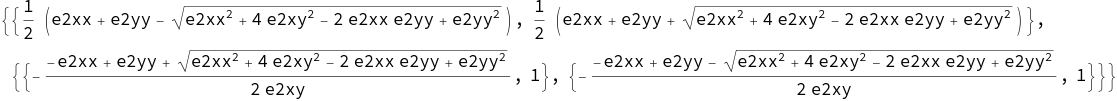

In [25]:
{e2val, e2vec} = Eigensystem[e2]

2                2
e2xx - Sqrt[4 e2xy  + (e2xx - e2yy) ] + e2yy
--------------------------------------------
                     2
 



>    0




0
 
                       2                2
     e2xx + Sqrt[4 e2xy  + (e2xx - e2yy) ] + e2yy
     --------------------------------------------
>                         2
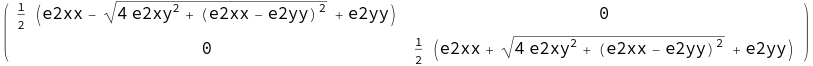

In [26]:
e2diag = DiagonalMatrix[e2val] // FullSimplify;
e2diag // MatrixForm

2         2                     2
-(-e2xx + e2yy + Sqrt[e2xx  + 4 e2xy  - 2 e2xx e2yy + e2yy ])
-------------------------------------------------------------
                           2 e2xy
 
                               2         2                     2
     -(-e2xx + e2yy - Sqrt[e2xx  + 4 e2xy  - 2 e2xx e2yy + e2yy ])
     -------------------------------------------------------------
>                               2 e2xy




1
 



>    1
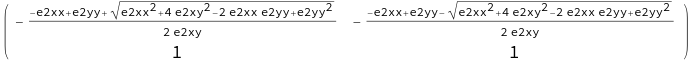

In [28]:
e2pass = Transpose@e2vec;
e2pass // MatrixForm

2         2                     2
  -(-e2xx + e2yy + Sqrt[e2xx  + 4 e2xy  - 2 e2xx e2yy + e2yy ])
{{-------------------------------------------------------------, 1}, 
                             2 e2xy
 
                               2         2                     2
     -(-e2xx + e2yy - Sqrt[e2xx  + 4 e2xy  - 2 e2xx e2yy + e2yy ])
>   {-------------------------------------------------------------, 1}}
                                2 e2xy
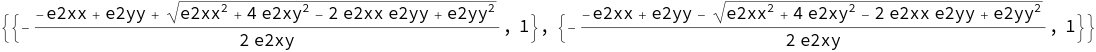

In [30]:
{u, v} = e2vec

2                2
                  e2xx - Sqrt[4 e2xy  + (e2xx - e2yy) ] - e2yy
{------------------------------------------------------------------------------, 
                                                   2                2
               2 (e2xx - e2yy) (-e2xx + Sqrt[4 e2xy  + (e2xx - e2yy) ] + e2yy)
 e2xy Sqrt[8 - ---------------------------------------------------------------]
                                                2
                                            e2xy
 
                                1
>   ----------------------------------------------------------}
                                 2                2         2
             (-e2xx + Sqrt[4 e2xy  + (e2xx - e2yy) ] + e2yy)
    Sqrt[1 + ------------------------------------------------]
                                       2
                                 4 e2xy
                                   2                2
                 e2xx + Sqrt[4 e2xy  + (e2xx - e2yy) ] - e2yy
{-----------------------------------------------------------------------------, 
                                                  2                2
               2 (e2xx - e2yy) (e2xx + Sqrt[4 e2xy  + (e2xx - e2yy) ] - e2yy)
 e2xy Sqrt[8 + --------------------------------------------------------------]
                                               2
                                           e2xy
 
                                1
>   ---------------------------------------------------------}
                                2                2         2
             (e2xx + Sqrt[4 e2xy  + (e2xx - e2yy) ] - e2yy)
    Sqrt[1 + -----------------------------------------------]
                                       2
                                 4 e2xy
        Sqrt[13]
 3 (1 + --------)
           3
{----------------, 1}
        2
        Sqrt[13]
 3 (1 - --------)
           3
{----------------, 1}
        2
Sqrt[13]
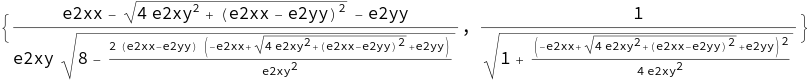
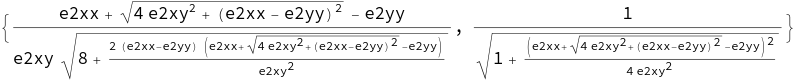
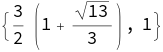
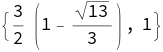

In [76]:
un = (u / Sqrt[u . u]) // FullSimplify
vn = (v / Sqrt[v . v]) // FullSimplify
u /. val2
v /. val2
u[[1]]*v[[2]] - u[[2]]*v[[1]] /. val2 // FullSimplify


2         2                     2  2
         (-e2xx + e2yy + Sqrt[e2xx  + 4 e2xy  - 2 e2xx e2yy + e2yy ])
Sqrt[1 + -------------------------------------------------------------]
                                          2
                                    4 e2xy
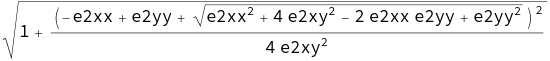

In [81]:
Sqrt[u.u]

2         2                     2  2
         (-e2xx + e2yy - Sqrt[e2xx  + 4 e2xy  - 2 e2xx e2yy + e2yy ])
Sqrt[1 + -------------------------------------------------------------]
                                          2
                                    4 e2xy
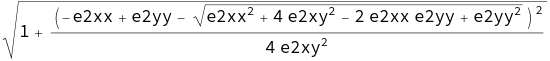

In [82]:
Sqrt[v.v]

we can check the formula $ D = P^{-1} E P $

2                2
e2xx - Sqrt[4 e2xy  + (e2xx - e2yy) ] + e2yy
--------------------------------------------
                     2
 



>    0




0
 
                       2                2
     e2xx + Sqrt[4 e2xy  + (e2xx - e2yy) ] + e2yy
     --------------------------------------------
>                         2
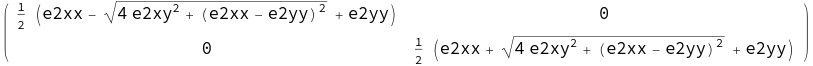

In [31]:
Inverse@e2pass . e2 . e2pass // FullSimplify // MatrixForm

The new axes are deduced from the transport matrix

### Numerical application

2   2 x y      2
x  - ----- + 2 y
       3
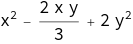

In [43]:
val2 = {e2xx -> 1, e2yy -> 2, e2xy -> -1/3};
ellipseM /. val2

0.899075   0.

0.         2.10093
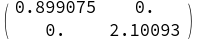

In [83]:
e2diag /. val2 // MatrixForm // FullSimplify // N

-Graphics-
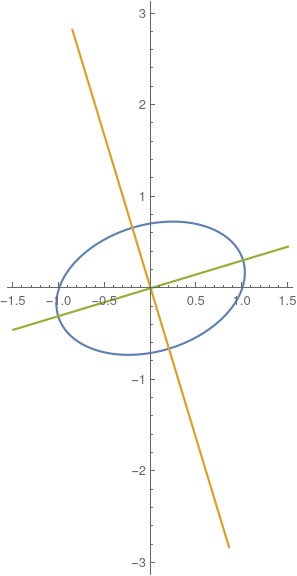

In [46]:
Plot[{
    y /. Solve[(ellipseM /. val2) == 1],
    y /. Solve[(u . g2 /. val2) == 0, y] ,
    y /. Solve[(v . g2 /. val2) == 0, y]
}, {x, -1.5, 1.5}, AspectRatio -> Automatic]

Sqrt[13]
 3 (1 + --------)
           3
{----------------, 1}
        2
        Sqrt[13]
 3 (1 - --------)
           3
{----------------, 1}
        2
0
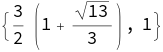
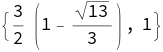

In [47]:
xn = (u /. val2)
yn = (v /. val2)
xn . yn // FullSimplify

{1, 1}
    1        1
{-------, -------}
 Sqrt[2]  Sqrt[2]
1
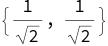

In [128]:
u = {1, 1}
un = (u / Sqrt[u . u]) /. val2 // FullSimplify
un . un // FullSimplify

6   2

2   2
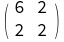

In [171]:
baseN /. val2

2
    (exx - eyy)
2 + ------------   exx - eyy
           2       ---------
        exy           exy



exx - eyy
---------
   exy             2
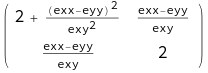

In [163]:
(Transpose@e2vec . (IdentityMatrix[2] /. val2) . e2vec) // FullSimplify // MatrixForm

By identification of the `ellipseP` polynom, we can find the coefficients of the `ellipseM` matrix

2  2  2  2    2   2  2   2    2     2  2   2    2    2
b  c  l  n  + a  (b  l  (l  + m ) + c  m  (l  + m  + n ))
---------------------------------------------------------
             2  2  2   2    2    2    2    2
            a  b  c  (l  + m ) (l  + m  + n )
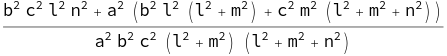

In [24]:
exx = ellipseP[[1]] / (x^2) // Simplify

2  2  2    2   2   2    2     2   2    2    2
l m (b  c  n  + a  (b  (l  + m ) - c  (l  + m  + n )))
------------------------------------------------------
           2  2  2   2    2    2    2    2
          a  b  c  (l  + m ) (l  + m  + n )
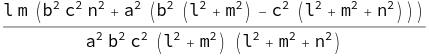

In [25]:
exy = ellipseP[[2]] / (2 x y) // Simplify

2  2  2  2    2   2  2   2    2     2  2   2    2    2
b  c  m  n  + a  (b  m  (l  + m ) + c  l  (l  + m  + n ))
---------------------------------------------------------
             2  2  2   2    2    2    2    2
            a  b  c  (l  + m ) (l  + m  + n )
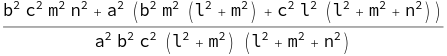

In [26]:
eyy = ellipseP[[3]] / (y^2) // Simplify

In [39]:
m = {{5, 4}, {1, 5}}

{{5, 4}, {1, 5}}

In [49]:
{mval, mvec} = Eigensystem[m];
mval
mvec
mpass = Transpose@mvec
mdiag = DiagonalMatrix[mval]

{7, 3}
{{2, 1}, {-2, 1}}
{{2, -2}, {1, 1}}
{{7, 0}, {0, 3}}

In [57]:
Inverse@mpass . m . mpass

{{7, 0}, {0, 3}}

-----

# DRAFT

In [179]:
(rot . (rot // Transpose)) // FullSimplify

{{1, 0, 0}, {0, 1, 0}, {0, 0, 1}}

In [180]:
((rot // Transpose) . rot) // FullSimplify

{{1, 0, 0}, {0, 1, 0}, {0, 0, 1}}

l n x1                    m y1               l z1
{{-------------------------------- - ------------- + ------------------}, 
        2    2        2    2    2          2    2          2    2    2
  Sqrt[l  + m ] Sqrt[l  + m  + n ]   Sqrt[l  + m ]   Sqrt[l  + m  + n ]
 
                  m n x1                    l y1               m z1
>   {-------------------------------- + ------------- + ------------------}, 
           2    2        2    2    2          2    2          2    2    2
     Sqrt[l  + m ] Sqrt[l  + m  + n ]   Sqrt[l  + m ]   Sqrt[l  + m  + n ]
 
                        2                                   2
                       l                                   m
>   {(-(--------------------------------) - --------------------------------) x1 + 
              2    2        2    2    2           2    2        2    2    2
        Sqrt[l  + m ] Sqrt[l  + m  + n ]    Sqrt[l  + m ] Sqrt[l  + m  + n ]
 
             n z1
>     ------------------}}
            2    2    2
      Sqrt[l  + m  + n ]
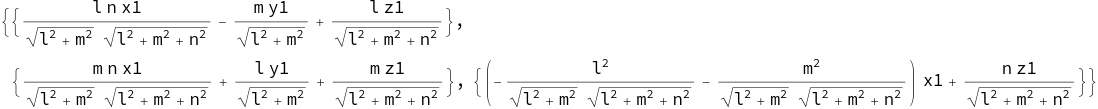

In [222]:
tra = rot . {{x1}, {y1}, {z1}}

l n x                      m y               l z
{x -> -------------------------------- - ------------- + ------------------, 
            2    2        2    2    2          2    2          2    2    2
      Sqrt[l  + m ] Sqrt[l  + m  + n ]   Sqrt[l  + m ]   Sqrt[l  + m  + n ]
 
                      m n x                      l y               m z
>   y -> -------------------------------- + ------------- + ------------------, 
               2    2        2    2    2          2    2          2    2    2
         Sqrt[l  + m ] Sqrt[l  + m  + n ]   Sqrt[l  + m ]   Sqrt[l  + m  + n ]
 
                            2                                   2
                           l                                   m
>   z -> (-(--------------------------------) - --------------------------------) x + 
                  2    2        2    2    2           2    2        2    2    2
            Sqrt[l  + m ] Sqrt[l  + m  + n ]    Sqrt[l  + m ] Sqrt[l  + m  + n ]
 
             n z
>     ------------------}
            2    2    2
      Sqrt[l  + m  + n ]
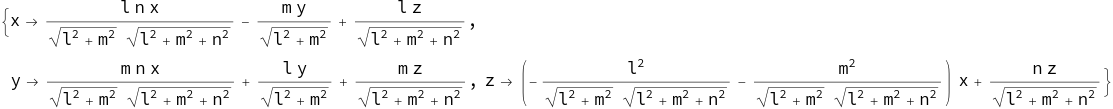

In [182]:
mat = {x -> tra[[1, 1]], y -> tra[[2, 1]], z -> tra[[3, 1]]}

We can check that in this new coordinates system, the plane is $Oxy$

In [68]:
plane = ({{m, m, k}} . g)[[1, 1]]

m x + m y + k z

2    2    2
{{Sqrt[l  + m  + n ] z}}
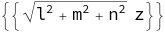

In [186]:
plan /. mat // FullSimplify

2      2      2
a x  + b y  + c z
                l n x                      m y               l z         2
a (-------------------------------- - ------------- + ------------------)  + 
         2    2        2    2    2          2    2          2    2    2
   Sqrt[l  + m ] Sqrt[l  + m  + n ]   Sqrt[l  + m ]   Sqrt[l  + m  + n ]
 
                    m n x                      l y               m z         2
>   b (-------------------------------- + ------------- + ------------------)  + 
             2    2        2    2    2          2    2          2    2    2
       Sqrt[l  + m ] Sqrt[l  + m  + n ]   Sqrt[l  + m ]   Sqrt[l  + m  + n ]
 
                               2                                   2
                              l                                   m
>   c Power[(-(--------------------------------) - --------------------------------) x + 
                     2    2        2    2    2           2    2        2    2    2
               Sqrt[l  + m ] Sqrt[l  + m  + n ]    Sqrt[l  + m ] Sqrt[l  + m  + n ]
 
              n z
>      ------------------, 2]
             2    2    2
       Sqrt[l  + m  + n ]
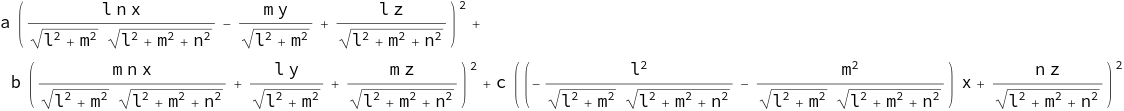

In [202]:
ellipsoid = (gr . ({{a, 0, 0}, {0, b, 0}, {0, 0, c}}) . gc)[[1, 1]]
ellipsoidR = ellipsoid /. mat

2    2 2       2      2   2   2
(c (l  + m )  + (a l  + b m ) n ) x
------------------------------------ + 
        2    2    2    2    2
      (l  + m ) (l  + m  + n )
 
                      2    2    2                    2    2    2             2      2   2
    (-2 a l m n Sqrt[l  + m  + n ] + 2 b l m n Sqrt[l  + m  + n ]) x y   (b l  + a m ) y
>   ------------------------------------------------------------------ + ----------------
                           2    2    2    2    2                              2    2
                         (l  + m ) (l  + m  + n )                            l  + m
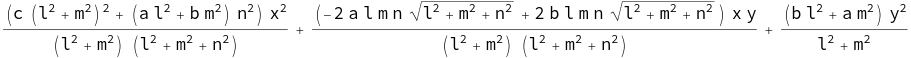

In [204]:
ellipse = Collect[(ellipsoidR /. { z -> 0 } // FullSimplify), {x, y, x*y}]

https://math.stackexchange.com/questions/874522/matrix-notation-of-an-ellipse

2    2 2       2      2   2
c (l  + m )  + (a l  + b m ) n
-------------------------------
     2    2    2    2    2
   (l  + m ) (l  + m  + n )
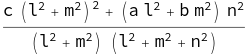

In [205]:
eA = ellipse[[1]] / x^2 // FullSimplify

2      2
b l  + a m
-----------
   2    2
  l  + m
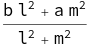

In [207]:
eB = ellipse[[3]] / y^2 // FullSimplify

(-a + b) l m n
----------------------------
  2    2        2    2    2
(l  + m ) Sqrt[l  + m  + n ]
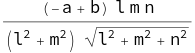

In [208]:
eC = ellipse[[2]] / (2*x*y) // FullSimplify

2           2
       -Sqrt[-]    -Sqrt[-]
  233        7           7   7
{{---, --------}, {--------, --}}
  140     5           5      15
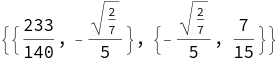

In [201]:
eM = {{ella, ellc}, {ellc, ellb}}  // FullSimplify

2            2 2                   2       2            2   2          2  4
((b - c) l  + (a - c) m )  + 2 (a - b) (-(b l ) + c l  + (a - c) m ) n  + (a - b)  n
-------------------------------------------------------------------------------------
                                     2    2    2 2
                                   (l  + m  + n )
                  2            2
         (a - b) m  + (a - c) n                    2            2 2
(b + c + ----------------------- - Sqrt[(((b - c) l  + (a - c) m )  + 
               2    2    2
              l  + m  + n
 
                          2       2            2   2          2  4      2    2    2 2
>         2 (a - b) (-(b l ) + c l  + (a - c) m ) n  + (a - b)  n ) / (l  + m  + n ) ])\
 
>    / 2
                  2            2
         (a - b) m  + (a - c) n                    2            2 2
(b + c + ----------------------- + Sqrt[(((b - c) l  + (a - c) m )  + 
               2    2    2
              l  + m  + n
 
                          2       2            2   2          2  4      2    2    2 2
>         2 (a - b) (-(b l ) + c l  + (a - c) m ) n  + (a - b)  n ) / (l  + m  + n ) ])\
 
>    / 2
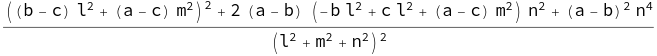
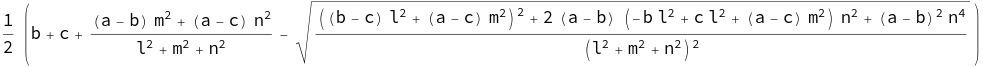
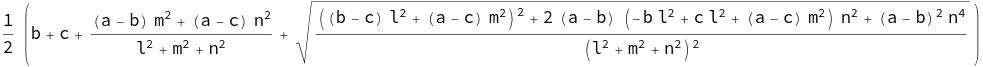

In [214]:
delta = (eA - eB)^2 + 4*eC^2 // FullSimplify
lambda1 = (eA + eB - Sqrt[delta]) / 2 // FullSimplify
lambda2 = (eA + eB + Sqrt[delta]) / 2 // FullSimplify

In [219]:
e[t_] := x / Sqrt[lambda1] Cos[t] + y / Sqrt[lambda2] Sin[t]

(Sqrt[2] x Cos[t]) / 
 
                           2            2
                  (a - b) m  + (a - c) n
>    Sqrt[b + c + ----------------------- - 
                        2    2    2
                       l  + m  + n
 
                       2            2 2                   2       2            2   2
>      Sqrt[(((b - c) l  + (a - c) m )  + 2 (a - b) (-(b l ) + c l  + (a - c) m ) n  + 
 
                  2  4      2    2    2 2
>          (a - b)  n ) / (l  + m  + n ) ]] + 
 
>   (Sqrt[2] y Sin[t]) / 
 
                           2            2
                  (a - b) m  + (a - c) n
>    Sqrt[b + c + ----------------------- + 
                        2    2    2
                       l  + m  + n
 
                       2            2 2                   2       2            2   2
>      Sqrt[(((b - c) l  + (a - c) m )  + 2 (a - b) (-(b l ) + c l  + (a - c) m ) n  + 
 
                  2  4      2    2    2 2
>          (a - b)  n ) / (l  + m  + n ) ]]
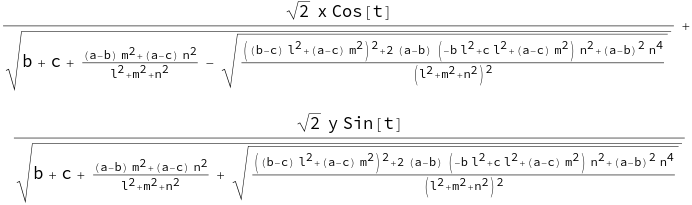

In [220]:
e[t]

-Graphics3D-
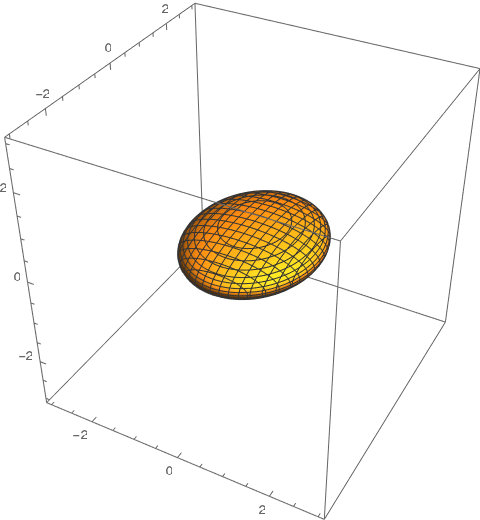

In [154]:
ContourPlot3D[{(estd /.demo) == 1, plan == 0}, {x, -3, 3}, {y, -3, 3}, {z, -3, 3}]

-Graphics3D-
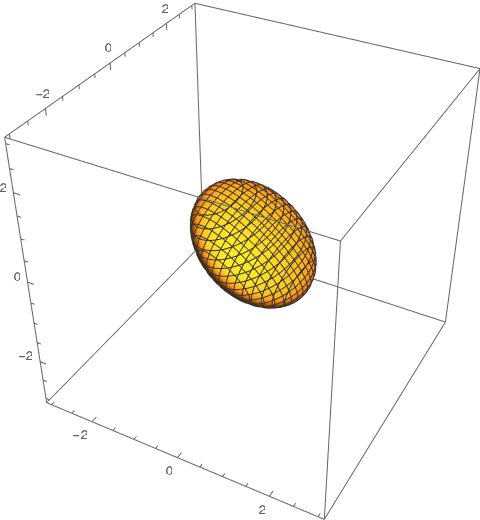

In [69]:
ContourPlot3D[{(erot /.demo) == 1, plan == 0}, {x, -3, 3}, {y, -3, 3}, {z, -3, 3}]